# DAT 490 Capstone
## *Analyzing Food Deserts and Food Insecurity in the United States*
### By Haley Allen, Philip Krause, and Amoreena Ordoñez

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## install packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import geopandas as gpd

In [3]:
## read in data, brief overview of data, cleaning, drop na's
# these paths are specific to my Google Drive file organization, adjust to yours

## Want to save our datasets as:
  # fara = Food Access Research Atlas
## AO file path
#path1 = "/content/drive/My Drive/Colab Notebooks/Data Files/FoodAccessResearchAtlasData2019.xlsx"

## HA file path
#path1 = "/content/drive/My Drive/Colab Notebooks/Data Files/FoodAccessResearchAtlasData2019.xlsx"

## PK file path
path1 = "/content/drive/My Drive/FoodAccessResearchAtlasData2019.xlsx"
fara_raw = pd.read_excel(path1, sheet_name = "Food Access Research Atlas") # there were 4 different tabs in the file, had to specify fara

  # snap = participation and costs
## AO file path
#path2 = "/content/drive/My Drive/Colab Notebooks/Data Files/snap-annualsummary-4.xlsx"

## HA file path
#path2 = "/content/drive/My Drive/Colab Notebooks/Data Files/snap-annualsummary-4.xlsx"

## PK file path
path2 = "/content/drive/My Drive/snap-annualsummary-4.xlsx"
snap = pd.read_excel(path2, header=2)

  # county = county and state level snap participation
## AO file path
#path3 = "/content/drive/My Drive/Colab Notebooks/Data Files/county_data (1).xls"

## HA file path
#path3 = "/content/drive/My Drive/Colab Notebooks/Data Files/county_data.xls"

##PK file path
#path3 = "/content/drive/My Drive/county_data.xls"
#county = pd.read_excel(path3, sheet_name = "County")


In [4]:
pd.options.display.min_rows = 50
fara_raw.isnull().sum().sort_values(ascending=False)

lalowi20                71025
lanhopi20share          71025
lanhopi20               71025
lahisp20share           71025
lahisp20                71025
laomultir20share        71025
laomultir20             71025
laaian20share           71025
laaian20                71025
laseniors20share        71025
laseniors20             71025
laasian20share          71025
laasian20               71025
lablack20share          71025
lablack20               71025
lawhite20share          71025
lawhite20               71025
lasnap20                71025
lahunv20                71025
lapop20                 71025
lapop20share            71025
lakids20share           71025
lalowi20share           71025
lakids20                71025
lahunv20share           70920
                        ...  
TractWhite                  4
TractHUNV                   4
TractSNAP                   4
PovertyRate                 3
OHU2010                     0
State                       0
CensusTract                 0
County                      0
GroupQuartersFlag           0
LAhalfand10                 0
LA1and10                    0
HUNVFlag                    0
LowIncomeTracts             0
LILATracts_Vehicle          0
LILATracts_1And20           0
LILATracts_1And10           0
LILATracts_halfAnd10        0
Pop2010                     0
Urban                       0
LATractsVehicle_20          0
LATracts20                  0
LA1and20                    0
LATracts_half               0
LATracts10                  0
LATracts1                   0
Length: 147, dtype: int64

In [5]:
# updating the column names in the snap dataset
snap.rename(columns={'Average Benefit Per Person 1] (Dollars)': 'Average Benefit Per Person (Dollars)'}, inplace=True)
snap.rename(columns={'All Other Costs 2] (Millions of Dollars)': 'All Other Costs (Millions of Dollars)'}, inplace=True)

In [6]:
# updating a few entries in the 'year' column
snap.iat[13,0] = 1982
snap = snap[:-4]
# converting data types from object to int
snap['Fiscal Year'] = snap['Fiscal Year'].astype(int)
snap["Fiscal Year"]

<ipython-input-6-7615644b5ecb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snap['Fiscal Year'] = snap['Fiscal Year'].astype(int)


0     1969
1     1970
2     1971
3     1972
4     1973
5     1974
6     1975
7     1976
8     1977
9     1978
10    1979
11    1980
12    1981
13    1982
14    1983
15    1984
16    1985
17    1986
18    1987
19    1988
20    1989
21    1990
22    1991
23    1992
24    1993
25    1994
26    1995
27    1996
28    1997
29    1998
30    1999
31    2000
32    2001
33    2002
34    2003
35    2004
36    2005
37    2006
38    2007
39    2008
40    2009
41    2010
42    2011
43    2012
44    2013
45    2014
46    2015
47    2016
48    2017
49    2018
50    2019
51    2020
52    2021
53    2022
54    2023
55    2024
Name: Fiscal Year, dtype: int64

Text(0, 0.5, 'Total Cost in Millions')

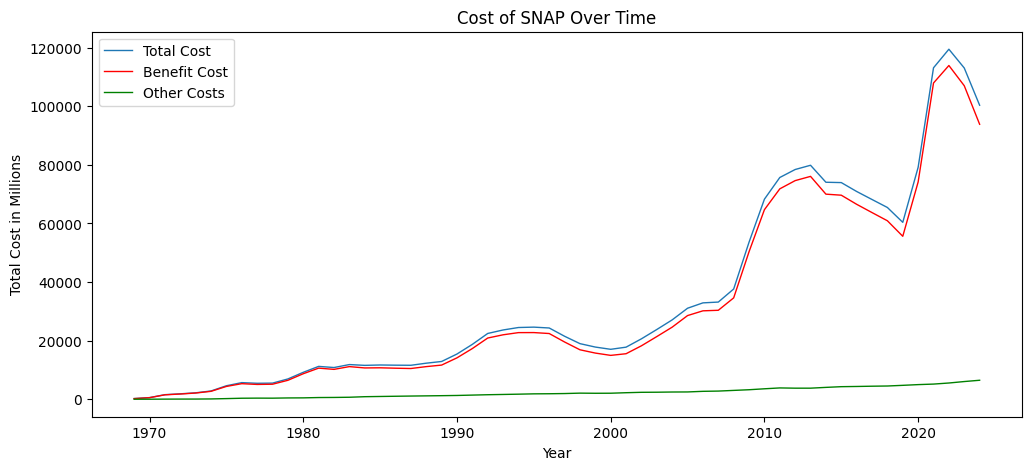

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(snap["Fiscal Year"], snap["Total Costs (Millions of Dollars)"], label = "Total Cost", linewidth=1)
plt.plot(snap["Fiscal Year"], snap["Total Benefits (Millions of Dollars)"], label = "Benefit Cost", color = 'red', linewidth=1)
plt.plot(snap["Fiscal Year"], snap["All Other Costs (Millions of Dollars)"], label = "Other Costs", color = 'green', linewidth=1)
plt.legend()
plt.title("Cost of SNAP Over Time")
plt.xlabel("Year")
plt.ylabel("Total Cost in Millions")

# total costs = SNAP benefits + Other Costs to support SNAP Program

Total Cost = SNAP Benefit Cost + Other Costs
The total and benefit costs of SNAP steadily increase over time, but experience spikes in 2008 and 2020. However, the other costs supporting SNAP do not.

2] Other Costs include the Federal share of State administrative expenses, Nutrition Education, and Employment and Training programs. Also includes other Federal costs (e.g., Benefit and Retailer Redemption and Monitoring, Payment Accuracy, EBT Systems, Program Evaluation and Modernization, Program Access, Health and Nutrition Pilot Projects).

Text(0, 0.5, 'Participation in Thousands')

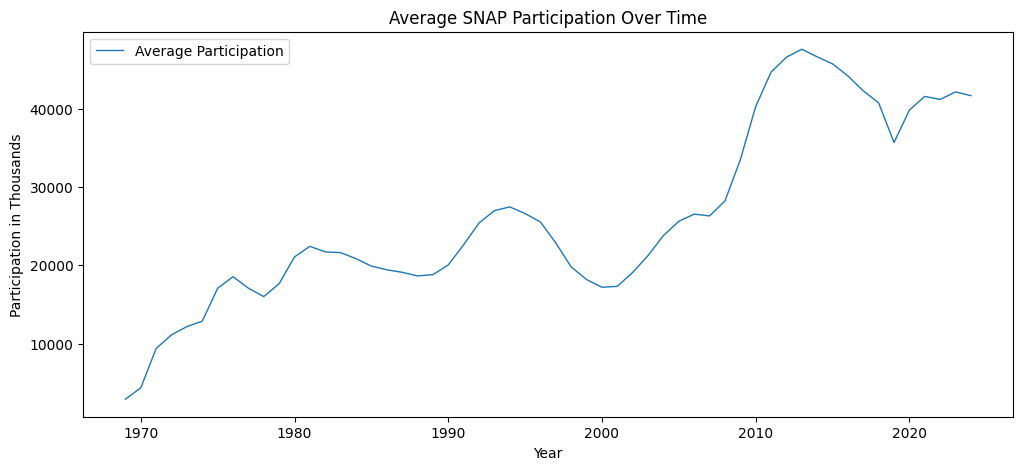

In [8]:
plt.figure(figsize=(12, 5))
plt.plot(snap["Fiscal Year"], snap["Average Participation (Thousands)"], label = "Average Participation", linewidth=1)
plt.legend()
plt.title("Average SNAP Participation Over Time")
plt.xlabel("Year")
plt.ylabel("Participation in Thousands")

There's a noticeable increase in average SNAP participation starting in 2008. Although the trend shows a decrease in average participation in the several years leading up to the pandemic, it spikes again in 2020 and has yet to return to pre_Recession numbers.

Text(0, 0.5, 'Monthly Benefits/Person')

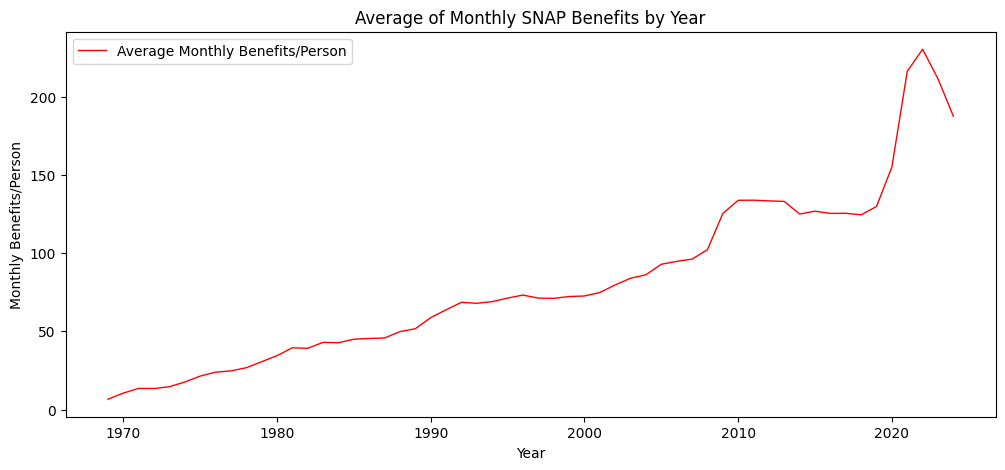

In [9]:
plt.figure(figsize=(12, 5))
plt.plot(snap["Fiscal Year"], snap["Average Benefit Per Person (Dollars)"], label = "Average Monthly Benefits/Person", color = 'red', linewidth=1)
plt.legend()
plt.title("Average of Monthly SNAP Benefits by Year")
plt.xlabel("Year")
plt.ylabel("Monthly Benefits/Person")

Up until about 2008, the average monthly SNAP benefits slowly increase, perhaps to adjust for the cost of living. There are two spikes again mirroring the Recession in 2008 and the COVID-19 pandemic in 2020.

Text(0, 0.5, 'Average Monthly Benefits/Person (Dollars)')

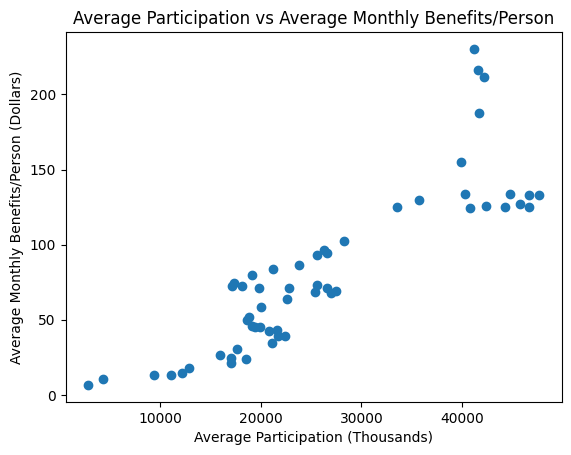

In [10]:
plt.scatter(snap["Average Participation (Thousands)"], snap['Average Benefit Per Person (Dollars)'])
plt.title('Average Participation vs Average Monthly Benefits/Person')
plt.xlabel('Average Participation (Thousands)')
plt.ylabel('Average Monthly Benefits/Person (Dollars)')

A positive correlation can be appreciated with this scatter plot. As average participation increases, so does the average monthly SNAP stipend.

In [11]:
#List of chosen columns
column_list = ['CensusTract', 'State', 'County','Urban','Pop2010','OHU2010','LowIncomeTracts','LATracts_half','LATracts1','LATracts10','LATracts20', 'TractLOWI', 'TractKids',
               'TractSeniors','TractHUNV','TractSNAP','HUNVFlag']

#Use only columns in list
fara = fara_raw[column_list]
fara.head()

CensusTract    State          County  Urban  Pop2010  OHU2010  \
0   1001020100  Alabama  Autauga County      1     1912      693   
1   1001020200  Alabama  Autauga County      1     2170      743   
2   1001020300  Alabama  Autauga County      1     3373     1256   
3   1001020400  Alabama  Autauga County      1     4386     1722   
4   1001020500  Alabama  Autauga County      1    10766     4082   

   LowIncomeTracts  LATracts_half  LATracts1  LATracts10  LATracts20  \
0                0              1          1           0           0   
1                1              1          1           0           0   
2                0              1          1           0           0   
3                0              1          1           0           0   
4                0              1          1           0           0   

   TractLOWI  TractKids  TractSeniors  TractHUNV  TractSNAP  HUNVFlag  
0      455.0      507.0         221.0        6.0      102.0         0  
1      802.0      606.0         214.0       89.0      156.0         0  
2     1306.0      894.0         439.0       99.0      172.0         0  
3      922.0     1015.0         904.0       21.0       98.0         0  
4     2242.0     3162.0        1126.0      230.0      339.0         1

In [12]:
fara.isnull().sum()

CensusTract        0
State              0
County             0
Urban              0
Pop2010            0
OHU2010            0
LowIncomeTracts    0
LATracts_half      0
LATracts1          0
LATracts10         0
LATracts20         0
TractLOWI          4
TractKids          4
TractSeniors       4
TractHUNV          4
TractSNAP          4
HUNVFlag           0
dtype: int64

In [13]:
fara = fara.dropna()
fara.isnull().sum()

CensusTract        0
State              0
County             0
Urban              0
Pop2010            0
OHU2010            0
LowIncomeTracts    0
LATracts_half      0
LATracts1          0
LATracts10         0
LATracts20         0
TractLOWI          0
TractKids          0
TractSeniors       0
TractHUNV          0
TractSNAP          0
HUNVFlag           0
dtype: int64

In [14]:
fara.describe()

CensusTract         Urban       Pop2010       OHU2010  \
count  7.252700e+04  72527.000000  72527.000000  72527.000000   
mean   2.782532e+10      0.760668   4256.683621   1609.213162   
std    1.581618e+10      0.426678   1956.004392    725.686904   
min    1.001020e+09      0.000000      1.000000      0.000000   
25%    1.212708e+10      1.000000   2899.000000   1108.000000   
50%    2.712979e+10      1.000000   4011.000000   1525.000000   
75%    4.103900e+10      1.000000   5330.500000   2021.000000   
max    5.604595e+10      1.000000  37452.000000  16043.000000   

       LowIncomeTracts  LATracts_half     LATracts1    LATracts10  \
count     72527.000000   72527.000000  72527.000000  72527.000000   
mean          0.417582       0.638866      0.335902      0.043928   
std           0.493164       0.480333      0.472308      0.204937   
min           0.000000       0.000000      0.000000      0.000000   
25%           0.000000       0.000000      0.000000      0.000000   
50%           0.000000       1.000000      0.000000      0.000000   
75%           1.000000       1.000000      1.000000      0.000000   
max           1.000000       1.000000      1.000000      1.000000   

         LATracts20     TractLOWI     TractKids  TractSeniors     TractHUNV  \
count  72527.000000  72527.000000  72527.000000  72527.000000  72527.000000   
mean       0.004784   1385.054352   1022.695327    555.197113    143.709736   
std        0.069004    983.709351    615.445960    351.805391    232.738869   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000    680.000000    611.000000    320.000000     36.000000   
50%        0.000000   1164.000000    924.000000    497.000000     82.000000   
75%        0.000000   1846.000000   1312.000000    718.000000    168.500000   
max        1.000000  12562.000000  11845.000000  17271.000000   6059.000000   

          TractSNAP      HUNVFlag  
count  72527.000000  72527.000000  
mean     201.753182      0.210790  
std      185.760089      0.407873  
min        0.000000      0.000000  
25%       67.000000      0.000000  
50%      152.000000      0.000000  
75%      282.000000      0.000000  
max     2175.000000      1.000000

Text(0, 0.5, 'Housing Units w/out Vehicle')

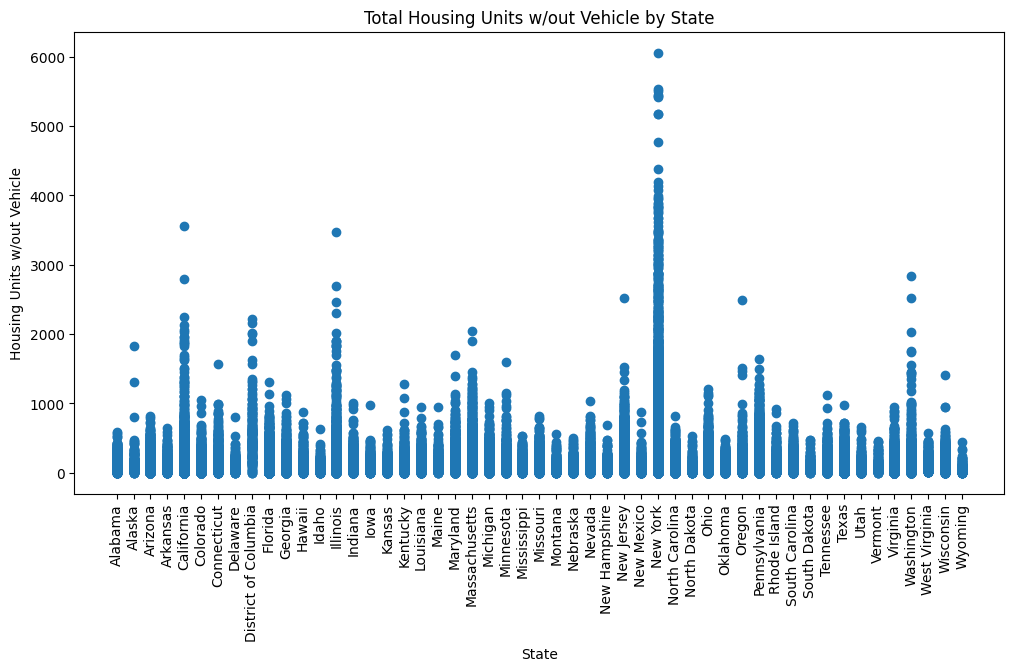

In [15]:
plt.figure(figsize=(12, 6))
plt.scatter(fara['State'], fara['TractHUNV'])
plt.title('Total Housing Units w/out Vehicle by State')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Housing Units w/out Vehicle')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'Oregon'),
  Text(1, 0, 'New Mexico'),
  Text(2, 0, 'Mississippi'),
  Text(3, 0, 'West Virginia'),
  Text(4, 0, 'Rhode Island'),
  Text(5, 0, 'Louisiana'),
  Text(6, 0, 'Kentucky'),
  Text(7, 0, 'Tennessee'),
  Text(8, 0, 'New York'),
  Text(9, 0, 'District of Columbia'),
  Text(10, 0, 'Florida'),
  Text(11, 0, 'Alabama'),
  Text(12, 0, 'Maine'),
  Text(13, 0, 'Michigan'),
  Text(14, 0, 'Georgia'),
  Text(15, 0, 'South Carolina'),
  Text(16, 0, 'Ohio'),
  Text(17, 0, 'North Carolina'),
  Text(18, 0, 'Washington'),
  Text(19, 0, 'Pennsylvania'),
  Text(20, 0, 'Oklahoma'),
  Text(21, 0, 'Texas'),
  Text(22, 0, 'Illinois'),
  Text(23, 0, 'Nevada'),
  Text(24, 0, 'Arkansas'),
  Text(25, 0, 'Arizona'),
  Text(26, 0, 'Massachusetts'),
  Text(27, 0, 'Con

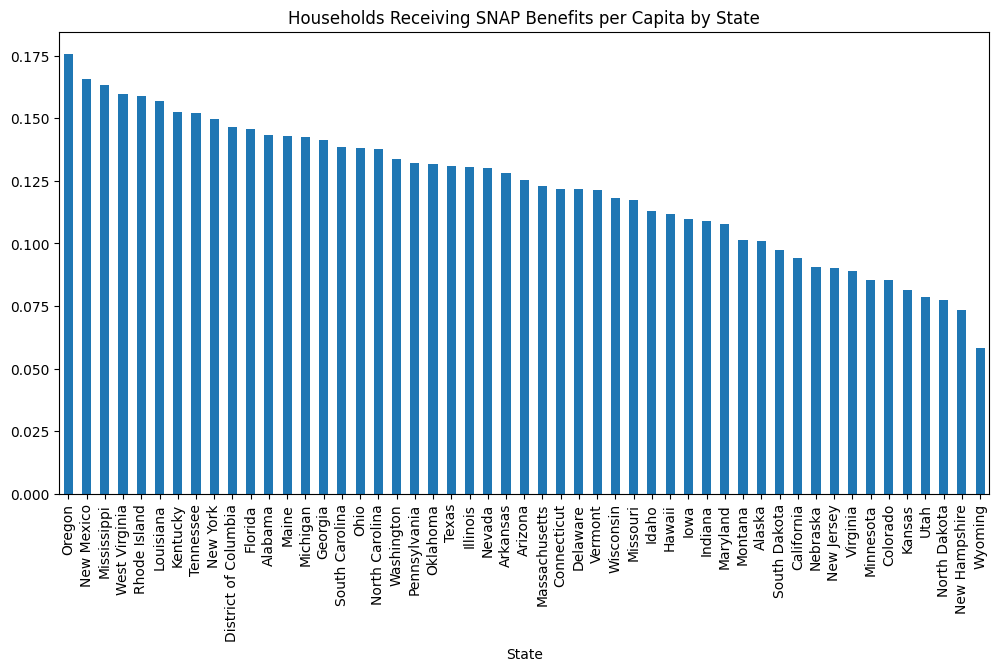

In [16]:
# aggregated and sorted TractSNAP housing units by state
SNAP_state = fara.groupby('State')['TractSNAP'].sum()
OHU_state = fara.groupby('State')['OHU2010'].sum()

SNAP_state_percap = SNAP_state / OHU_state
SNAP_state_percap = SNAP_state_percap.sort_values(ascending=False)

# aggregated and sorted HUNVFlag counts by state
HUNV_state = fara.groupby('State')['HUNVFlag'].sum()

HUNV_state_percap = HUNV_state / OHU_state
HUNV_state_percap = HUNV_state_percap.sort_values(ascending=False)

# Plot for SNAP per capita by state
plt.figure(figsize=(12, 6))
SNAP_state_percap.plot(kind="bar")
plt.title('Households Receiving SNAP Benefits per Capita by State')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'West Virginia'),
  Text(1, 0, 'District of Columbia'),
  Text(2, 0, 'Mississippi'),
  Text(3, 0, 'Louisiana'),
  Text(4, 0, 'Kentucky'),
  Text(5, 0, 'Arkansas'),
  Text(6, 0, 'South Carolina'),
  Text(7, 0, 'Alaska'),
  Text(8, 0, 'Rhode Island'),
  Text(9, 0, 'Ohio'),
  Text(10, 0, 'Alabama'),
  Text(11, 0, 'Pennsylvania'),
  Text(12, 0, 'Georgia'),
  Text(13, 0, 'Michigan'),
  Text(14, 0, 'Missouri'),
  Text(15, 0, 'North Carolina'),
  Text(16, 0, 'Massachusetts'),
  Text(17, 0, 'Indiana'),
  Text(18, 0, 'Maine'),
  Text(19, 0, 'Tennessee'),
  Text(20, 0, 'Connecticut'),
  Text(21, 0, 'Delaware'),
  Text(22, 0, 'Maryland'),
  Text(23, 0, 'Illinois'),
  Text(24, 0, 'Virginia'),
  Text(25, 0, 'Wisconsin'),
  Text(26, 0, 'New Mexico'),
  Text(27,

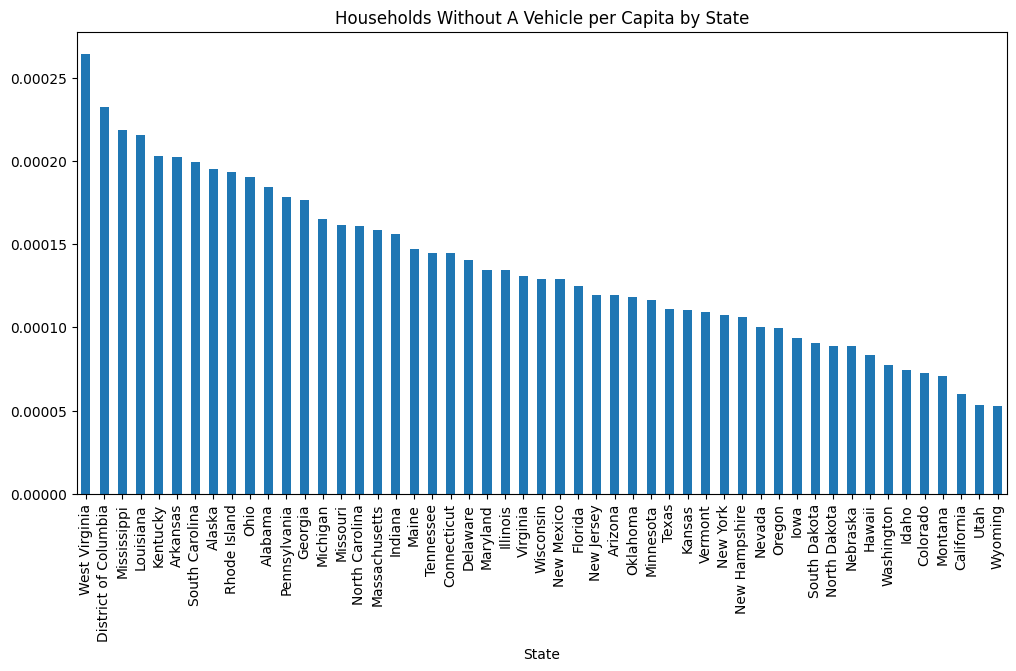

In [17]:
# Plot for Vehicle per capita by state
plt.figure(figsize=(12, 6))
HUNV_state_percap.plot(kind="bar")
plt.title('Households Without A Vehicle per Capita by State')
plt.xticks(rotation=90)

Text(0, 0.5, 'Frequency')

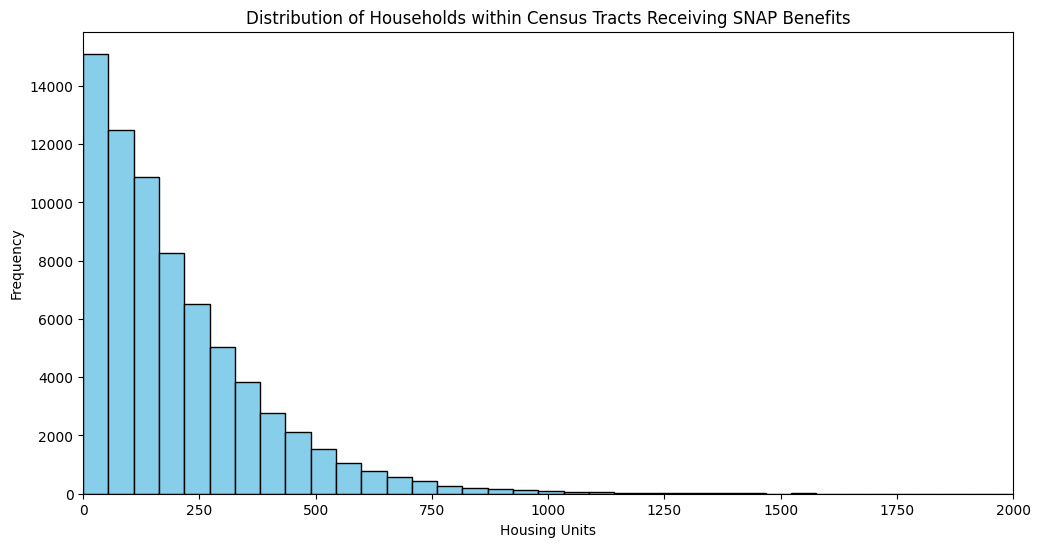

In [18]:
plt.figure(figsize=(12, 6))
plt.hist(fara['TractSNAP'], bins = 40, color = 'skyblue', edgecolor = "black")
plt.xlim(0, 2000)  # Set x-axis limit starting from 0
plt.title('Distribution of Households within Census Tracts Receiving SNAP Benefits')
plt.xlabel('Housing Units')
plt.ylabel('Frequency')
# notes: right-skewed distribution means there are few data points with very high values that pull the mean
#        towards the right, creating a longer tail on that side. The mean will be higher than the median, median will be higher than mode.

Text(0, 0.5, 'Frequency')

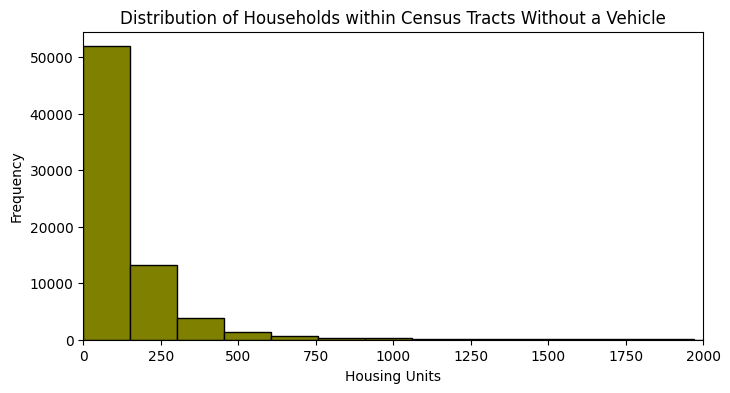

In [19]:
plt.figure(figsize=(8, 4))
plt.hist(fara['TractHUNV'], bins = 40, color = 'olive', edgecolor = "black")
plt.xlim(0, 2000)  # Set x-axis limit starting from 0
plt.title('Distribution of Households within Census Tracts Without a Vehicle')
plt.xlabel('Housing Units')
plt.ylabel('Frequency')

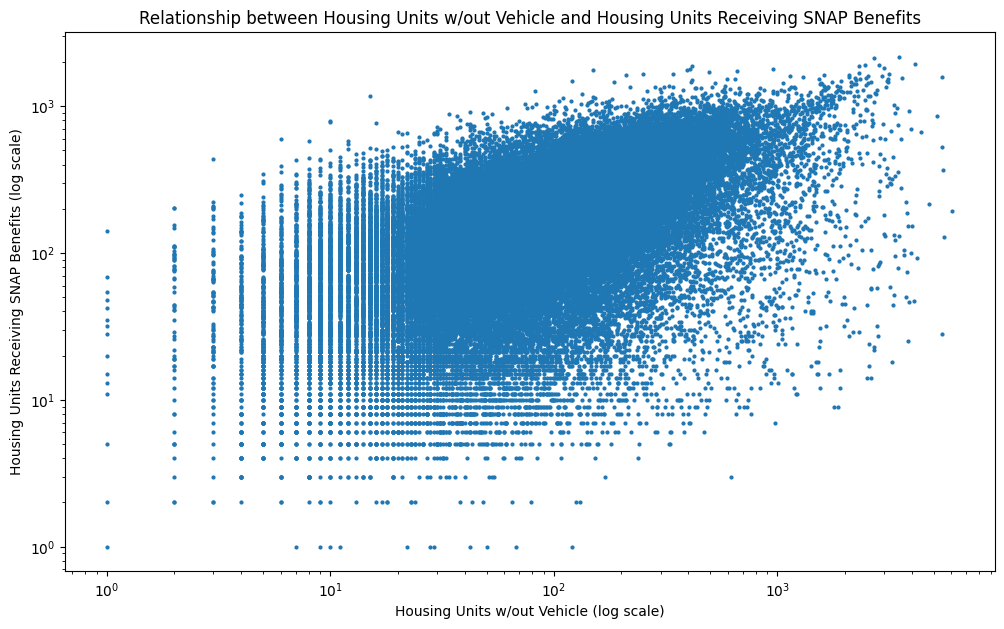

In [20]:
x = fara['TractHUNV']
y = fara['TractSNAP']
plt.figure(figsize=(12, 7))
plt.scatter(x, y, s = 4)
plt.title('Relationship between Housing Units w/out Vehicle and Housing Units Receiving SNAP Benefits')
plt.xlabel('Housing Units w/out Vehicle (log scale)')
plt.ylabel('Housing Units Receiving SNAP Benefits (log scale)')
plt.xscale('log')
plt.yscale('log')

Log-transformed scatter plot showing a possible relationship between total housing units in a census tract receiving SNAP benefits and without a vehicle.



In [21]:
top10_states = ['Oregon', 'New Mexico', 'Mississippi', 'West Virginia', 'Rhode Island', 'Louisiana', 'Kentucky', 'Tennessee', 'New York',
                'District of Columbia']
condition = fara['State'].isin(top10_states)
filtered_df = fara[condition]
filtered_df.shape

(11485, 17)

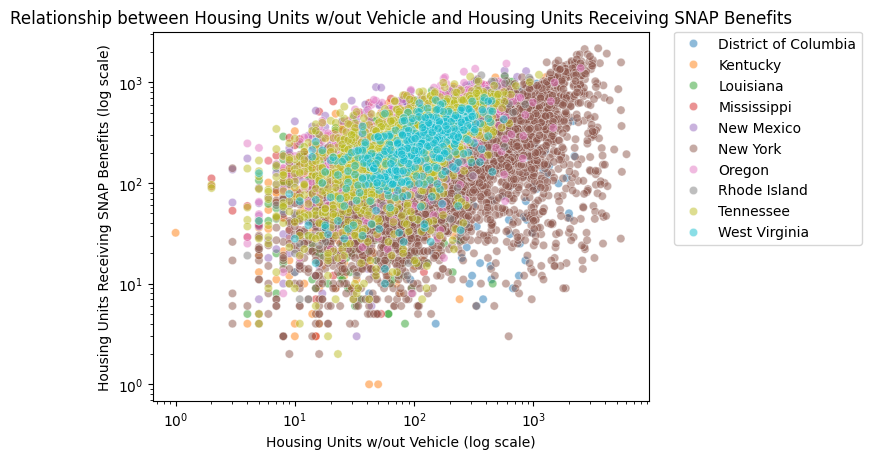

In [22]:
sns.scatterplot(x = 'TractHUNV', y = 'TractSNAP', data = filtered_df, hue="State", alpha = 0.5)
plt.title('Relationship between Housing Units w/out Vehicle and Housing Units Receiving SNAP Benefits')
plt.xlabel('Housing Units w/out Vehicle (log scale)')
plt.ylabel('Housing Units Receiving SNAP Benefits (log scale)')
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# FARA Mapping

In [24]:
## Reading tract GIS shp files
tract_shapes = gpd.read_file("/content/drive/My Drive/cb_2019_us_tract_500k.zip")

In [25]:
# Using same crs for mapping
tract_shapes = tract_shapes.to_crs(5070)

# Excluding areas outside of CONUS
exclude_list = [15, 72, 2, 60, 66, 69, 78]
tract_shapes = tract_shapes.loc[~tract_shapes['STATEFP'].astype(int).isin(exclude_list)]


# Making same column heading for both datasets
tract_shapes = tract_shapes.rename(columns={'GEOID': 'CensusTract'})

# Merging datasets by tract code
fara['CensusTract'] = fara['CensusTract'].astype(str).str.zfill(11)
tract_shapes['CensusTract'] = tract_shapes['CensusTract'].astype(str)
fara_gdf = tract_shapes.merge(fara, on='CensusTract')

Text(0.5, 1.0, 'Tracts with Low Access at 20 Miles and Low Vehicle Access')

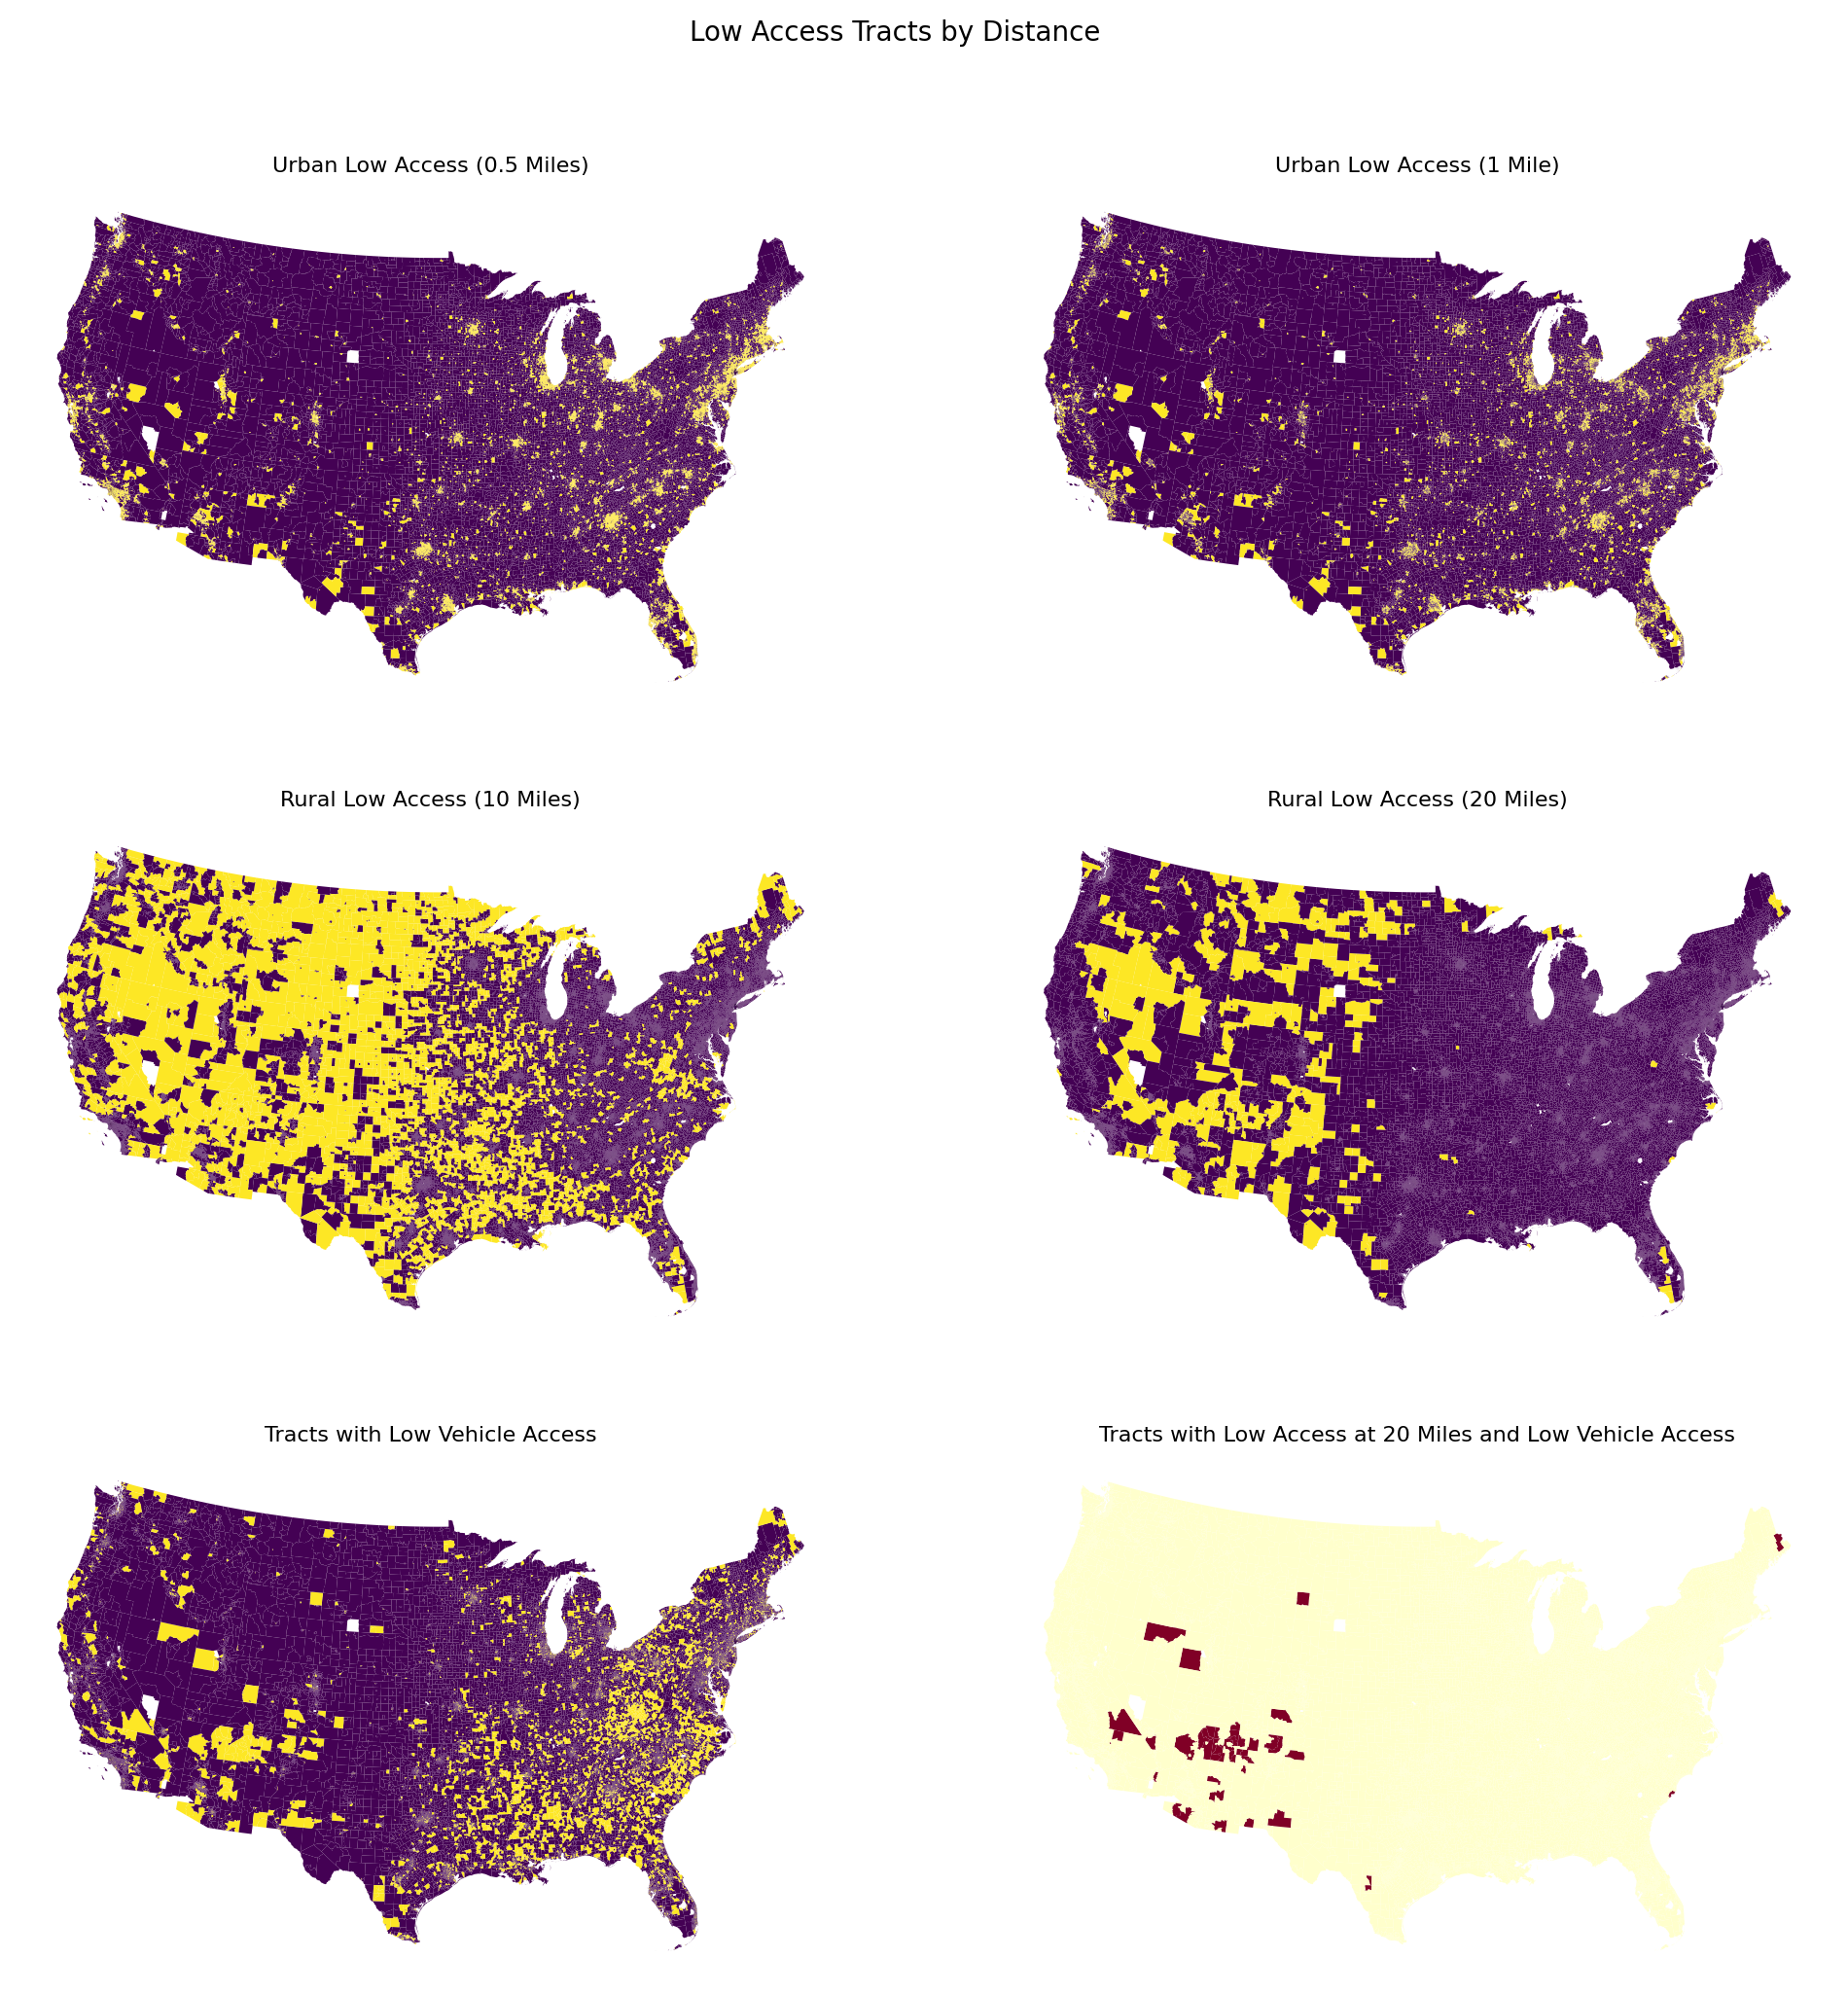

In [26]:
## Plotting country-wide plots of low access tracts and vehicle access

fig, ax1 = plt.subplots(3,2, figsize=(12, 12), dpi=200)

# Removing axes for all plots
for ax in ax1.flat:
    ax.set_axis_off()

fig.suptitle('Low Access Tracts by Distance', fontsize=10, y= 0.95)

# 1/2 mile low access plot
fara_gdf.plot(ax = ax1[0][0], column = 'LATracts_half',linewidth = 0,edgecolor = 'none')
ax1[0][0].set_title('Urban Low Access (0.5 Miles)', fontsize = 8)

# 1 mile low access plot
fara_gdf.plot(ax = ax1[0][1], column = 'LATracts1',linewidth = 0,edgecolor = 'none')
ax1[0][1].set_title('Urban Low Access (1 Mile)', fontsize = 8)

# 10 miles low access plot
fara_gdf.plot(ax = ax1[1][0], column = 'LATracts10',linewidth = 0,edgecolor = 'none')
ax1[1][0].set_title('Rural Low Access (10 Miles)', fontsize = 8)

# 20 miles low access plot
fara_gdf.plot(ax = ax1[1][1], column = 'LATracts20',linewidth = 0,edgecolor = 'none')
ax1[1][1].set_title('Rural Low Access (20 Miles)', fontsize = 8)

# Car access plot to compare with low access
fara_gdf.plot(ax = ax1[2][0], column = 'HUNVFlag',linewidth = 0,edgecolor = 'none')
ax1[2][0].set_title('Tracts with Low Vehicle Access', fontsize = 8)

# Creating new column to indicate where both variables are flagged
fara_gdf['20_and_HUNV'] = np.where((fara_gdf['LATracts20'] == 1) & (fara_gdf['HUNVFlag'] == 1), 1, 0)

fara_gdf.plot(ax=ax1[2][1], column='20_and_HUNV', linewidth=0, edgecolor='none',cmap = 'YlOrRd')
ax1[2][1].set_title('Tracts with Low Access at 20 Miles and Low Vehicle Access',fontsize=8)


Text(0.5, 1.0, 'Chicago Low Access Tracts (1 Mile)')

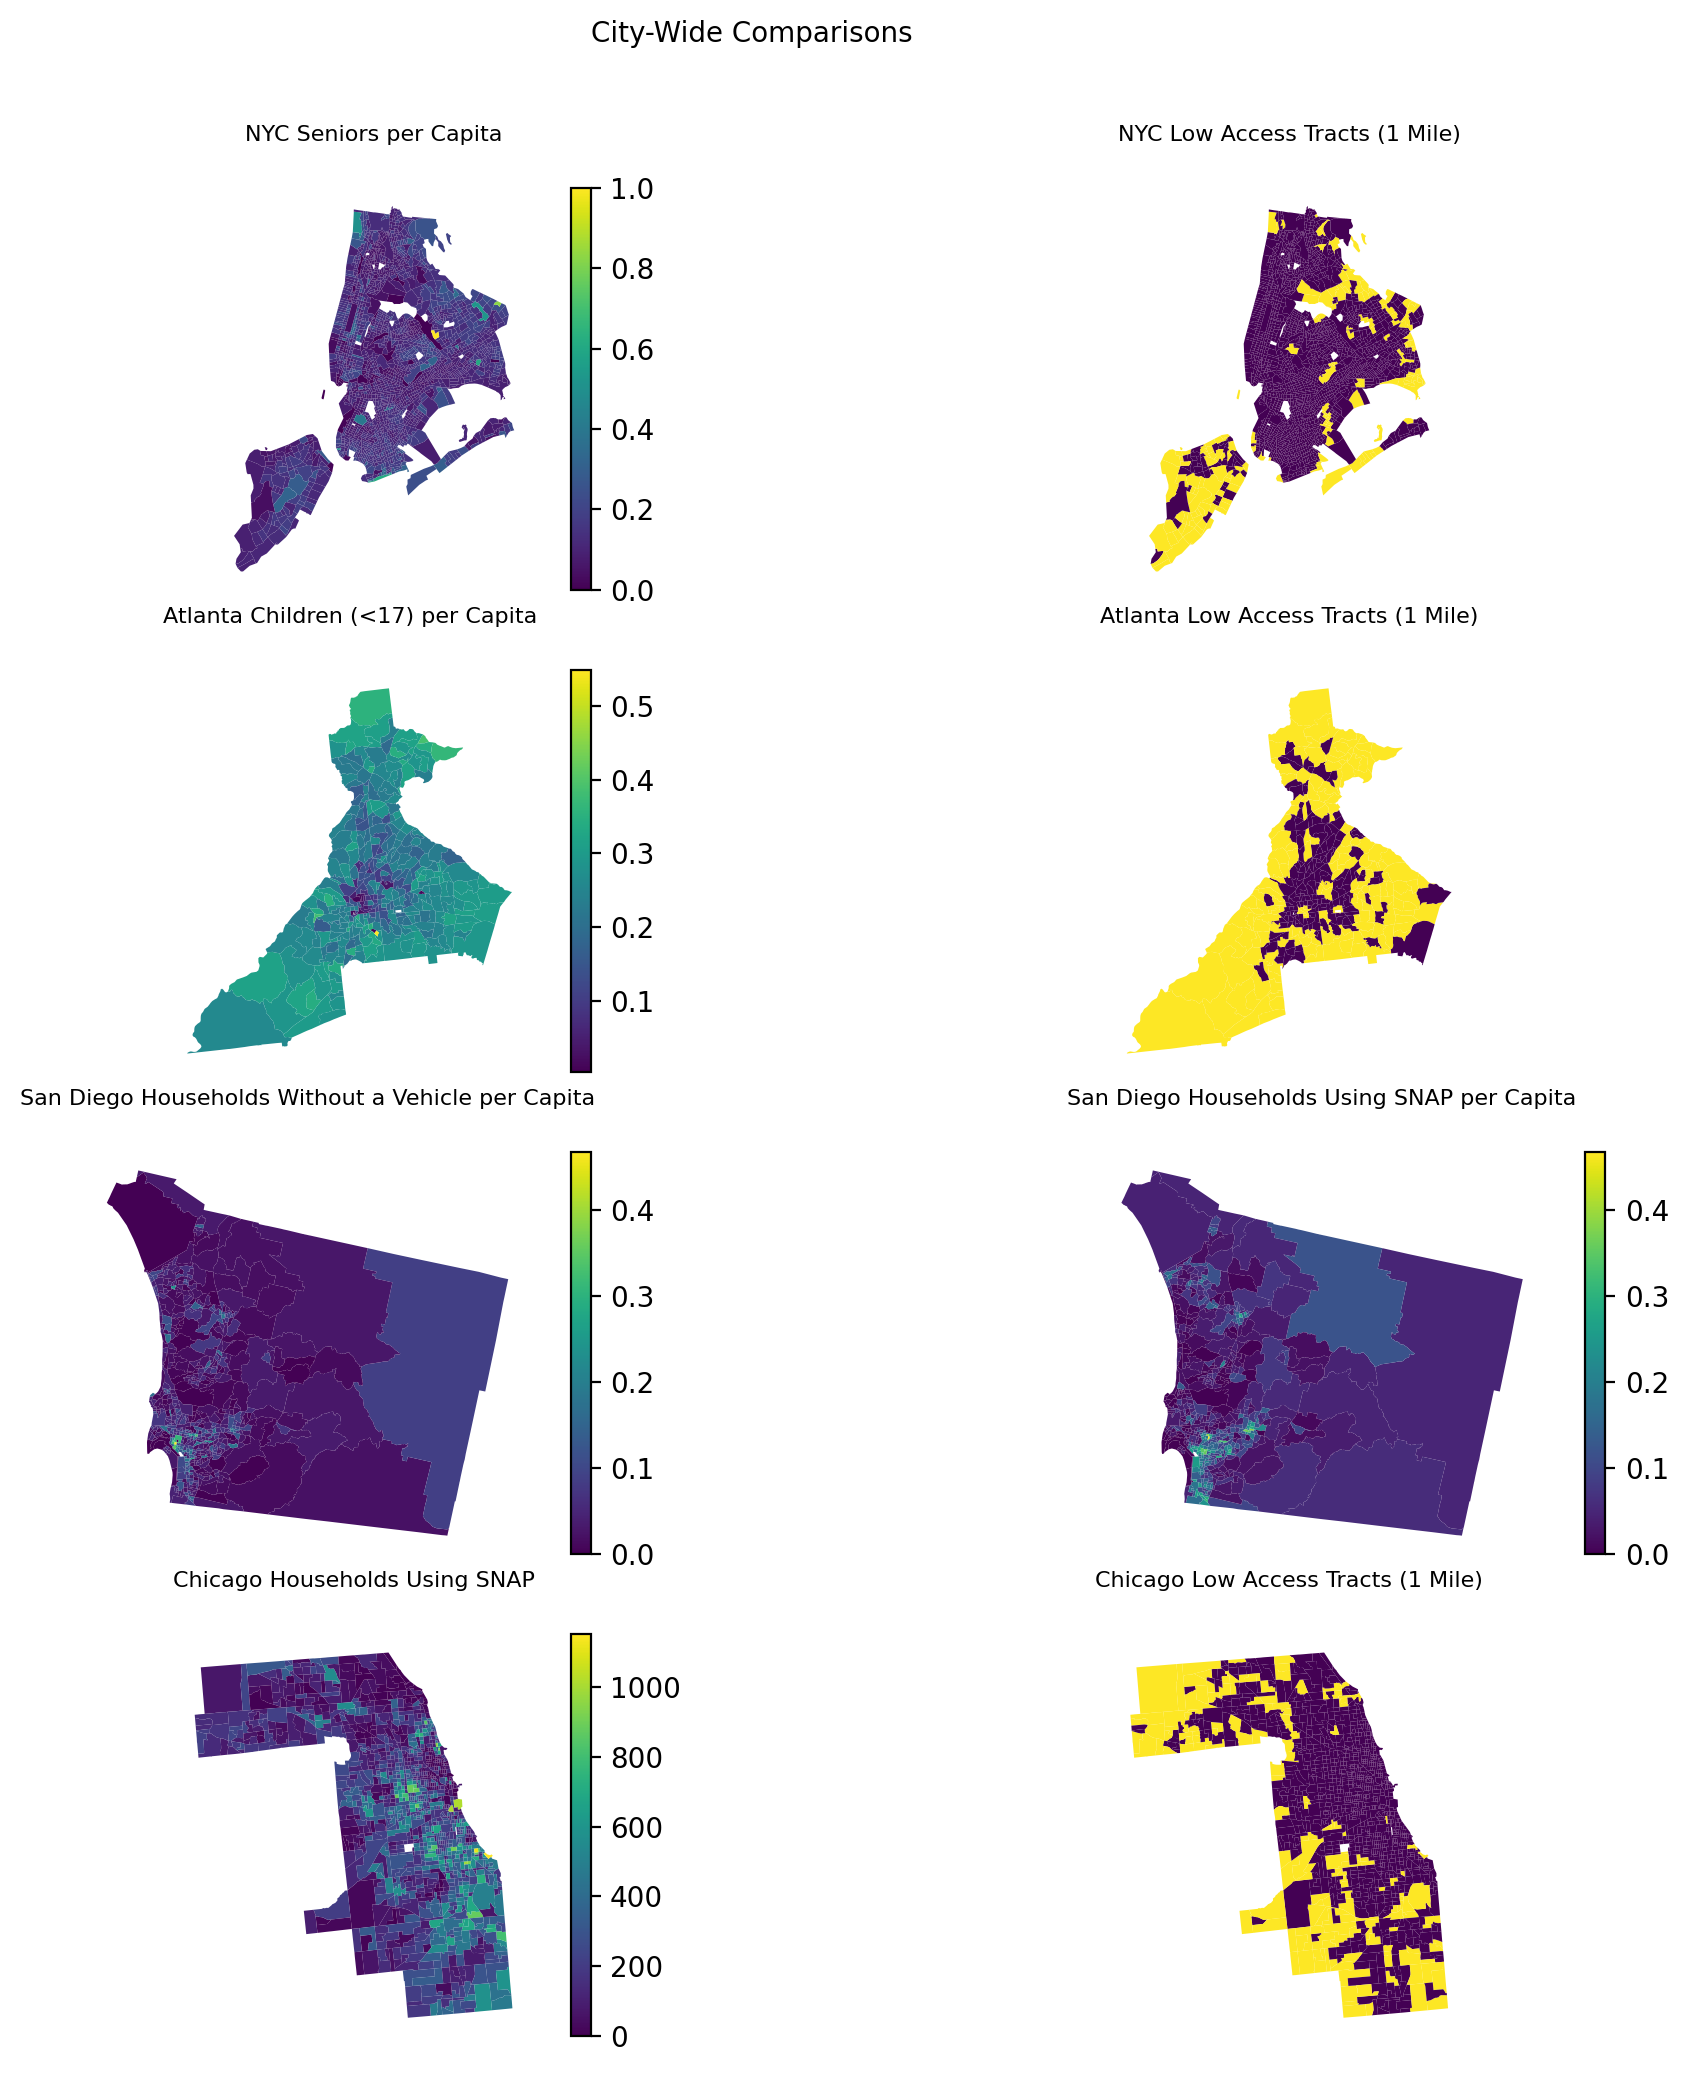

In [27]:
## Mapping city-wide based on several variables
fig, ax1 = plt.subplots(4, 2, figsize=(12, 12), dpi=200)

# Setting all axes off
for ax in ax1.flat:
    ax.set_axis_off()

# Creating per capita variables
fara_gdf['HUNV_per_cap'] = fara_gdf['TractHUNV'] / fara_gdf['OHU2010']
fara_gdf['SNAP_per_cap'] = fara_gdf['TractSNAP'] / fara_gdf['OHU2010']
fara_gdf['senior_per_cap'] = fara_gdf['TractSeniors'] / fara_gdf['Pop2010']
fara_gdf['kid_per_cap'] = fara_gdf['TractKids'] / fara_gdf['Pop2010']

fig.suptitle('City-Wide Comparisons', fontsize=10, y = 0.95)

## Multiple Counties (NYC) -- comparing senior numbers with low access
nyc_list = ["061", "005", "047", "085", "081"]
fara_gdf[(fara_gdf['STATEFP']== "36") & (fara_gdf['COUNTYFP'].isin(nyc_list))].plot(ax = ax1[0][0], column = 'senior_per_cap', linewidth = 0,
                                                                                    edgecolor = 'none', legend = True)
ax1[0][0].set_title('NYC Seniors per Capita', fontsize = 8)
fara_gdf[(fara_gdf['STATEFP']== "36") & (fara_gdf['COUNTYFP'].isin(nyc_list))].plot(ax = ax1[0][1], column = 'LATracts_half', linewidth = 0, edgecolor = 'none')
ax1[0][1].set_title('NYC Low Access Tracts (1 Mile)',fontsize = 8)

## Multiple Counties (Atlanta) -- comparing kid numbers with low access
atl_list = ['121','089']
fara_gdf[(fara_gdf['STATEFP']== "13") & (fara_gdf['COUNTYFP'].isin(atl_list))].plot(ax = ax1[1][0], column = 'kid_per_cap', linewidth = 0,
                                                                                    edgecolor = 'none', legend = True)
ax1[1][0].set_title('Atlanta Children (<17) per Capita',fontsize = 8)

fara_gdf[(fara_gdf['STATEFP']== "13") & (fara_gdf['COUNTYFP'].isin(atl_list))].plot(ax = ax1[1][1], column = 'LATracts1', linewidth = 0,edgecolor = 'none')
ax1[1][1].set_title('Atlanta Low Access Tracts (1 Mile)',fontsize = 8)

## San Diego County -- comparing vehicle access to SNAP recipients
fara_gdf[(fara_gdf['STATEFP']== "06") & (fara_gdf['COUNTYFP']== "073")].plot(ax = ax1[2][0], column = 'HUNV_per_cap', linewidth = 0,
                                                                             edgecolor = 'none', legend = True)
ax1[2][0].set_title('San Diego Households Without a Vehicle per Capita',fontsize = 8)

fara_gdf[(fara_gdf['STATEFP']== "06") & (fara_gdf['COUNTYFP']== "073")].plot(ax = ax1[2][1], column = 'SNAP_per_cap', linewidth = 0,
                                                                             edgecolor = 'none', legend = True)
ax1[2][1].set_title('San Diego Households Using SNAP per Capita',fontsize = 8)

## Cook County (Chicago) -- comparing SNAP numbers to low access
fara_gdf[(fara_gdf['STATEFP']== "17") & (fara_gdf['COUNTYFP']== "031")].plot(ax = ax1[3][0], column = 'TractSNAP',linewidth = 0,
                                                                             edgecolor = 'none', legend = True)
ax1[3][0].set_title('Chicago Households Using SNAP',fontsize = 8)

fara_gdf[(fara_gdf['STATEFP']== "17") & (fara_gdf['COUNTYFP']== "031")].plot(ax = ax1[3][1], column = 'LATracts1',linewidth = 0,edgecolor = 'none')
ax1[3][1].set_title('Chicago Low Access Tracts (1 Mile)',fontsize = 8)

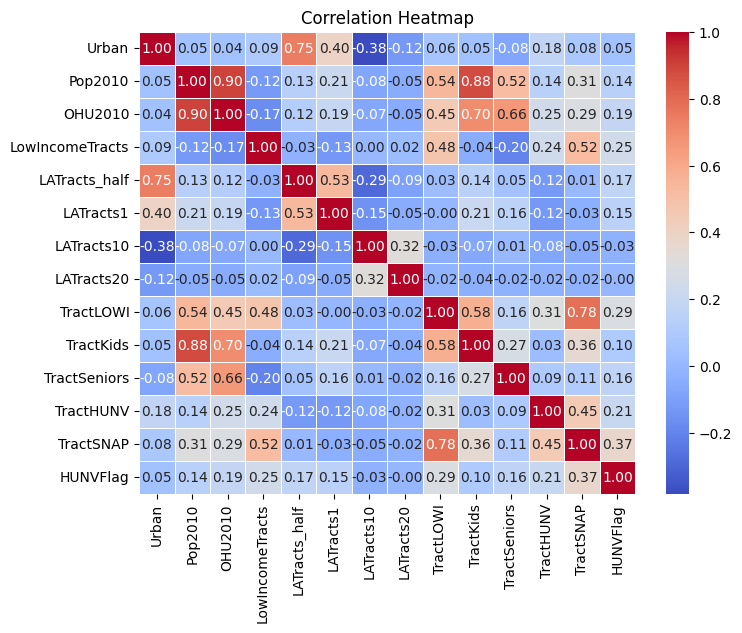

In [44]:
corr_matrix = fara.corr(numeric_only=True)

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [36]:
## racial/ethnicity demographic visualizations and insight //AO
## barplot for each demo y = state, x = count, count will combine low access at any mile marker
state_data = fara_raw.groupby("State", as_index = False)

## get demos

lawhite = state_data[['lawhitehalf', 'lawhite1', 'lawhite10','lawhite20']].sum()
lablack = state_data[['lablackhalf', 'lablack1', 'lablack10', 'lablack20']].sum()
laasian = state_data[['laasianhalf', 'laasian1', 'laasian10', 'laasian20']].sum()
lanhopi = state_data[['lanhopihalf', 'lanhopi1', 'lanhopi10', 'lanhopi20']].sum()
laaian = state_data[['laaianhalf', 'laaian1', 'laaian10', 'laaian20']].sum()
laomultir = state_data[['laomultirhalf', 'laomultir1', 'laomultir10', 'laomultir20']].sum()
lahisp = state_data[['lahisphalf', 'lahisp1', 'lahisp10', 'lahisp20']].sum()
laseniors = state_data[['laseniorshalf', 'laseniors1', 'laseniors10', 'laseniors20']].sum()

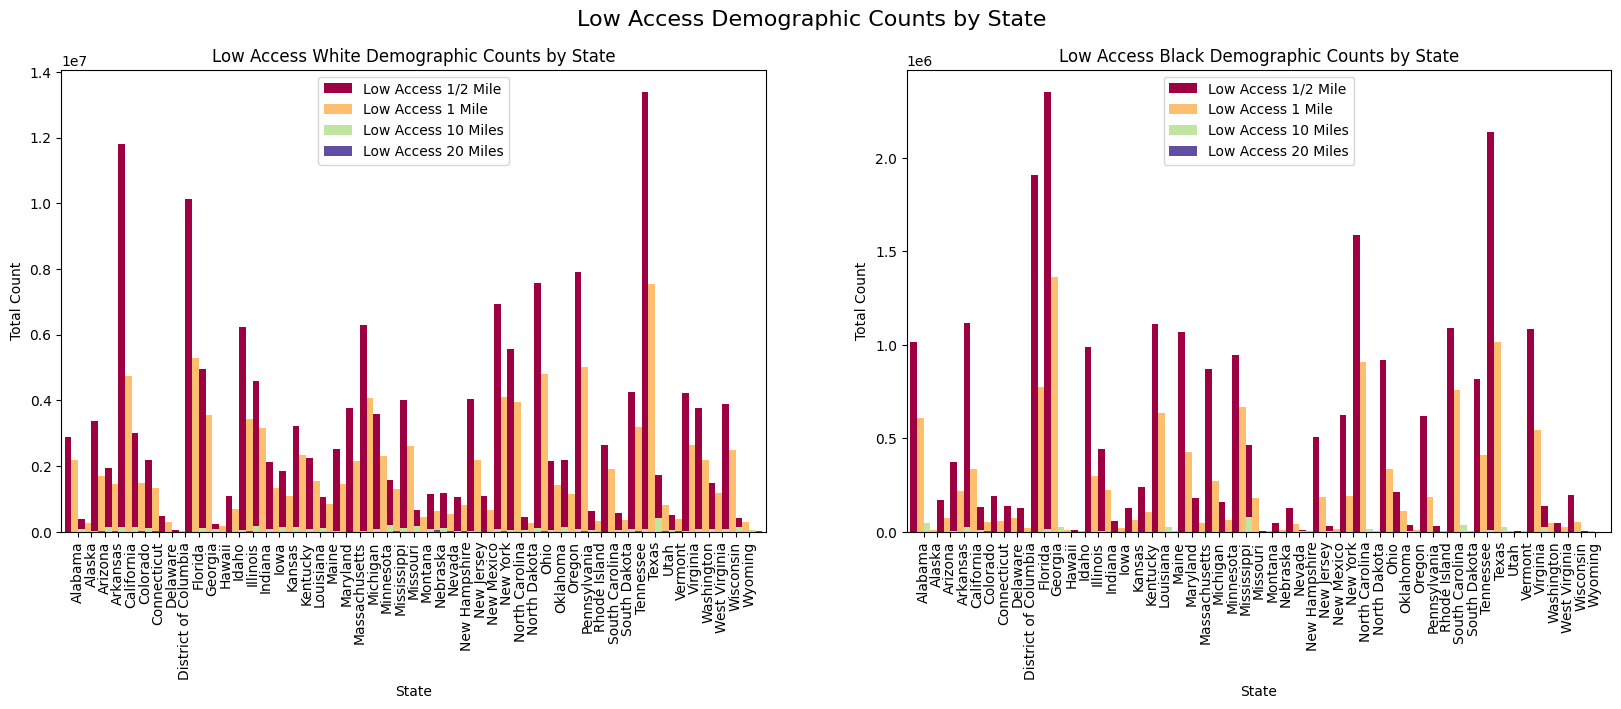

In [37]:
#subplot figure for all demo bar graphs
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))
fig.subplots_adjust(wspace = 0.2, hspace = 0.9)
fig.suptitle("Low Access Demographic Counts by State", fontsize = 16)

## white low access
lawhite.plot(kind = "bar", x = "State", width = 2, title = "Low Access White Demographic Counts by State",
             ylabel = "Total Count", colormap = "Spectral", ax = axes[0])
axes[0].legend(["Low Access 1/2 Mile", "Low Access 1 Mile", "Low Access 10 Miles", "Low Access 20 Miles"])

## black low access
lablack.plot(kind = "bar", x = "State", width = 2, title = "Low Access Black Demographic Counts by State",
             ylabel = "Total Count", colormap = "Spectral", ax = axes[1])
axes[1].legend(["Low Access 1/2 Mile", "Low Access 1 Mile", "Low Access 10 Miles", "Low Access 20 Miles"])



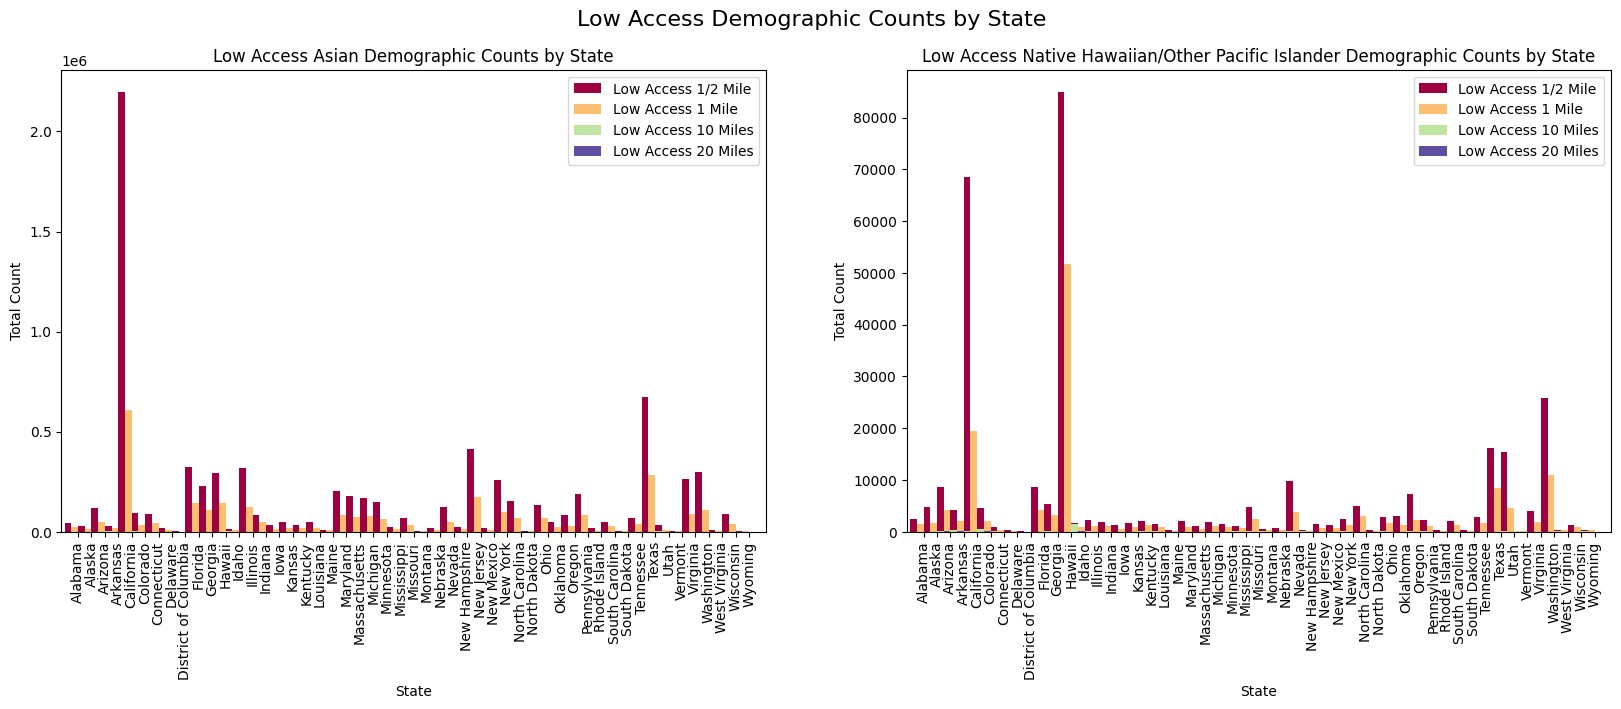

In [38]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))
fig.subplots_adjust(wspace = 0.2, hspace = 0.9)
fig.suptitle("Low Access Demographic Counts by State", fontsize = 16)

##asian low access
laasian.plot(kind = "bar", x = "State", width = 2, title = "Low Access Asian Demographic Counts by State",
             ylabel = "Total Count", colormap = "Spectral", ax = axes[0])
axes[0].legend(["Low Access 1/2 Mile", "Low Access 1 Mile", "Low Access 10 Miles", "Low Access 20 Miles"])

##native hawaiian and other pacific islander
lanhopi.plot(kind = "bar", x = "State", width = 2, title = "Low Access Native Hawaiian/Other Pacific Islander Demographic Counts by State",
             ylabel = "Total Count", colormap = "Spectral", ax = axes[1])
axes[1].legend(["Low Access 1/2 Mile", "Low Access 1 Mile", "Low Access 10 Miles", "Low Access 20 Miles"])


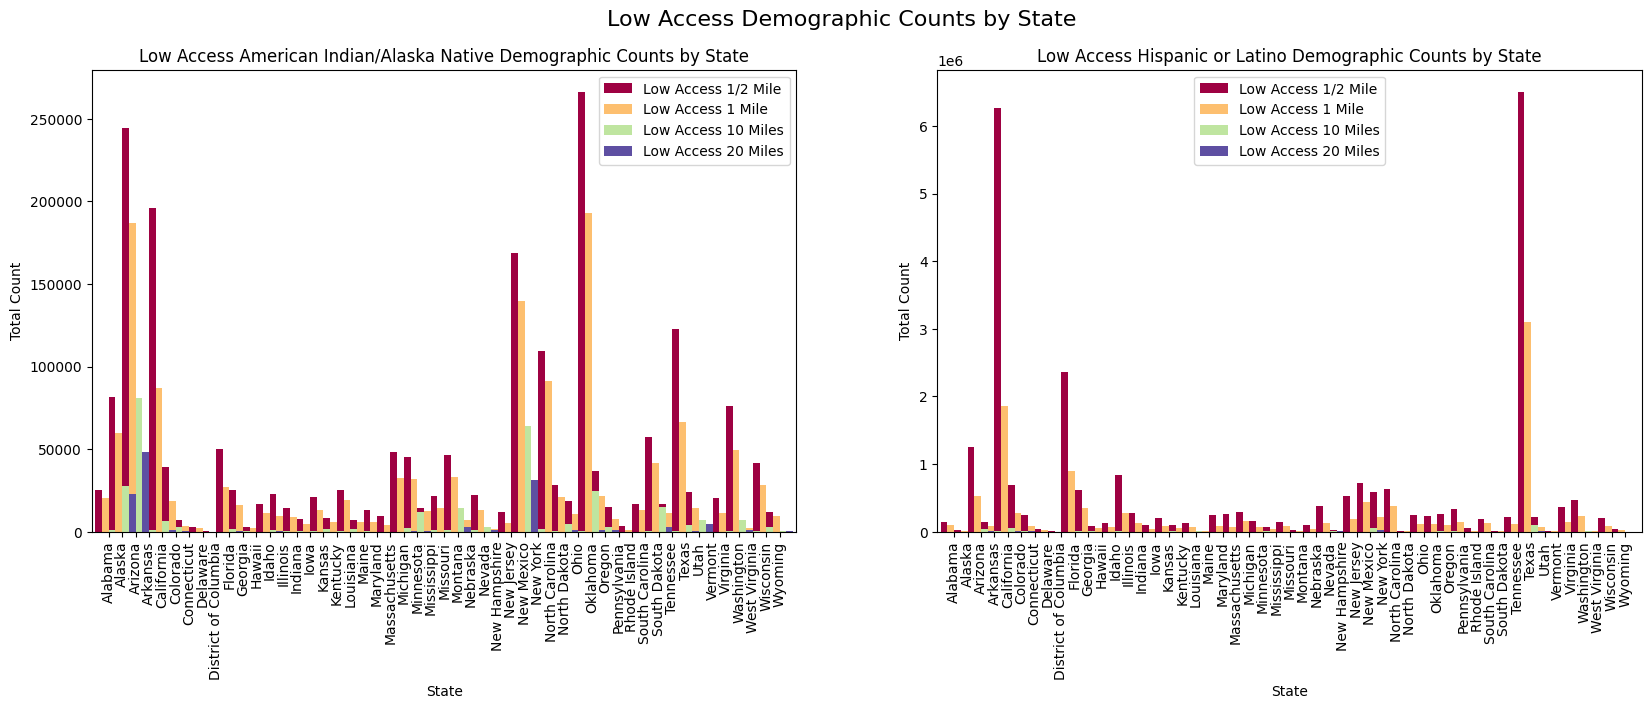

In [39]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))
fig.subplots_adjust(wspace = 0.2, hspace = 0.9)
fig.suptitle("Low Access Demographic Counts by State", fontsize = 16)
## american indian and alaska native
laaian.plot(kind = "bar", x = "State", width = 2, title = "Low Access American Indian/Alaska Native Demographic Counts by State",
             ylabel = "Total Count", colormap = "Spectral", ax = axes[0])
axes[0].legend(["Low Access 1/2 Mile", "Low Access 1 Mile", "Low Access 10 Miles", "Low Access 20 Miles"])

## hispanic/latino
lahisp.plot(kind = "bar", x = "State", width = 2, title = "Low Access Hispanic or Latino Demographic Counts by State",
             ylabel = "Total Count", colormap = "Spectral", ax = axes[1])
axes[1].legend(["Low Access 1/2 Mile", "Low Access 1 Mile", "Low Access 10 Miles", "Low Access 20 Miles"])


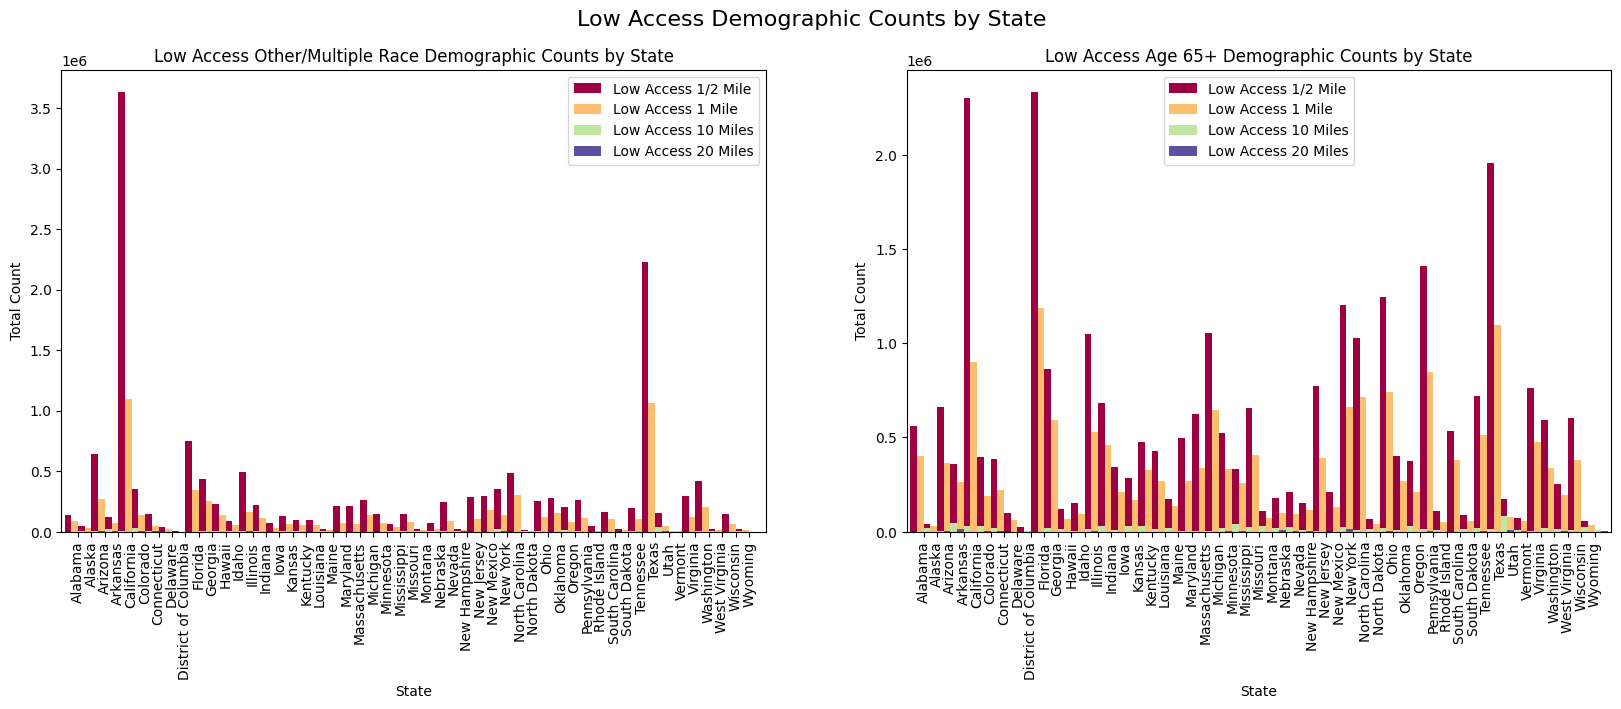

In [40]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))
fig.subplots_adjust(wspace = 0.2, hspace = 0.9)
fig.suptitle("Low Access Demographic Counts by State", fontsize = 16)
## other/ multiracial
laomultir.plot(kind = "bar", x = "State", width = 2, title = "Low Access Other/Multiple Race Demographic Counts by State",
             ylabel = "Total Count", colormap = "Spectral", ax = axes[0])
axes[0].legend(["Low Access 1/2 Mile", "Low Access 1 Mile", "Low Access 10 Miles", "Low Access 20 Miles"])

## seniors
laseniors.plot(kind = "bar", x = "State", width = 2, title = "Low Access Age 65+ Demographic Counts by State",
             ylabel = "Total Count", colormap = "Spectral", ax = axes[1])
axes[1].legend(["Low Access 1/2 Mile", "Low Access 1 Mile", "Low Access 10 Miles", "Low Access 20 Miles"])
